In [1]:
#import FilePreproccessing
#%run Percobaan3.ipynb import preprocess
from ipynb.fs.defs.FilePreproccessing import preprocess as FPreProccesing
from ipynb.fs.defs.FilePreproccessing import get_fitur as FGetFitur
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#import csv
import collections
#import pickle 
from collections import Counter
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import svm, naive_bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model 
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
train_df_raw = pd.read_csv('C:\\Users\\navi\\Coba Coding 12 Juli 2020_menggunakan data beneran\\CleanedModel - Copy.csv',sep=',',names=['Tweet','Label'], header=None)
test_df_raw = pd.read_csv('C:\\Users\\navi\\Coba Coding 12 Juli 2020_menggunakan data beneran\\CleanedTestingSet.csv',sep=',',names=['Tweet','LabelManual'],header=None)
train_df_raw = train_df_raw[train_df_raw['Tweet'].notnull()]
test_df_raw = test_df_raw[test_df_raw['Tweet'].notnull()]

In [3]:
train_df_raw

,Tweet,Label
0,ini kenapa internet rumah saya lambat banget y...,1
1,cara berhenti berlangganan bagaimana caranya ya,1
2,telfon nomor di atas di suruh lewat twitter le...,0
3,hai admin sepertinya sekarang sudah ok,1
4,assalamualaikum nomer pelanggan,1
...,...,...
946,roman terbaik kuba cacerita cinta kekolotan ad...,1
947,bahasa ditulis penuh berhatihati tapi baca pen...,1
948,demmit sedih laa cerita menahan air mata maskulin,1
949,bahasa bintang jalan cerita bintang,1


In [4]:
X_train=train_df_raw['Tweet'].tolist()

X_test=test_df_raw['Tweet'].tolist()
Y_train=[x if x == 0 else 1 for x in train_df_raw['Label'].tolist()]


In [5]:
Y_train

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [6]:
vectorizer = TfidfVectorizer(max_df=1.0, max_features=2000,
                             min_df=0, preprocessor=FPreProccesing,
							 stop_words=None, tokenizer=FGetFitur) #"stop_words=stop_words"

X_train=vectorizer.fit_transform(X_train).toarray()
X_test=vectorizer.transform(X_test).toarray()

In [7]:
feature_names=vectorizer.get_feature_names()

print(len(feature_names))

2000


In [8]:
modelnb = MultinomialNB()
nbtrain = modelnb.fit(X_train,Y_train)
#===Contoh yg pakai LinearRegression===#
  #MaxEnt = linear_model.LogisticRegression(max_iter=1000,multi_class='multinomial',solver='lbfgs')
  #print MaxEnt
  #MaxEnt.fit(X_train,y_train)
#===End Of Contoh yg pakai LinearRegression===#

In [9]:
nbtrain

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
weighted_prediction=nbtrain.predict(X_test)

In [11]:
weighted_prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [12]:
print(len(weighted_prediction)) #harusnya 100. tapi saat ini outputnya 101->headernya ikut keitung sepertinya

101


In [13]:
print("Count Accuracy ... ")
skf=StratifiedKFold(n_splits=5,random_state=0)
scores=cross_val_score(nbtrain,X_train,Y_train,cv=skf)
precision_score=cross_val_score(nbtrain,X_train,Y_train,cv=skf,scoring='precision')
recall_score=cross_val_score(nbtrain, X_train,Y_train, cv=skf, scoring ='recall')

Count Accuracy ... 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [14]:
print("Recall :%0.2f"%recall_score.mean())
print("Precision :%0.2f"%precision_score.mean())
print("Accuracy :%0.2f" % scores.mean())

Recall :0.66
Precision :0.83
Accuracy :0.74


In [15]:
labels, values = zip(*Counter(weighted_prediction).items())
#print(len(labels))
#print("====")
#print(len(values))

#print(collections.Counter(weighted_prediction))
SentimenPositif=values[1]
SentimenNegatif=values[0]

In [16]:
ind=np.arange(1)
width=0.50

In [17]:
ind

array([0])

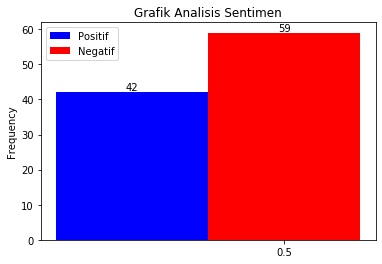

In [18]:
ax = plt.subplot(111)


yvals = SentimenPositif
rects1 = ax.bar(ind, yvals, width, color='blue')
zvals = SentimenNegatif
rects2 = ax.bar(ind+width, zvals, width, color='red')
ax.set_ylabel("Frequency")


ax.set_xticks(ind+width)

#ax.set_xticklabels(["Positif"])
ax.legend((rects1[0], rects2[0]), ('Positif', 'Negatif'))

for rect in rects1:
	h = rect.get_height()
	ax.text(rect.get_x()+rect.get_width()/2,1*h, '%d'%int(h),ha='center',va='bottom') 

for rect in rects2:
	h = rect.get_height()
	ax.text(rect.get_x()+rect.get_width()/2,1*h, '%d'%int(h),ha='center',va='bottom') 

#plt.axis([0,10, 0,300])
plt.title("Grafik Analisis Sentimen")
plt.show()